In this notebook, we will process and analyze the 41 eligible papers that came out of our survey to track their basic characteristics.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, OrderedDict
from pywaffle import Waffle
import plotly.express as px
import plotly.graph_objects as go

import plotly.io as pio
pio.templates.default = 'seaborn'

In [3]:
initial_file = pd.read_csv('Eligble_papers.csv')

In [4]:
save_loc = 'plots/'

In [5]:
print(initial_file.columns)

Index(['Index', 'State', 'Title', 'Dataset used', 'Problem', 'Algorithms',
       'Type of feedback', 'Solution', 'Metrics', 'Result on book dataset',
       'Type of prediction', 'Bias definition',
       'Considers book characteristics', 'Dataset preprocessing',
       'Bias perspective', 'Hyperparameter tuning', 'Code provided',
       'Framework', 'Bias type', 'Action', 'Link', 'Venue', 'Venue_renamed',
       'Publisher', 'Type', 'Year'],
      dtype='object')


In [6]:
hist_columns = ['Dataset used', 'Type of feedback', 'Type of prediction', 'Considers book characteristics', 'Dataset preprocessing', 'Bias perspective', 'Hyperparameter tuning', 'Code provided', 'Framework',
                'Bias type', 'Action']

## Papers per year

In [7]:
papers_per_year = dict(Counter(initial_file.Year))
for year in range(min(papers_per_year.keys()),max(papers_per_year.keys())+1):
    if year not in papers_per_year.keys():
        papers_per_year[year] = 0
# papers_per_year=pd.Series(papers_per_year).sort_index()
papers_per_year = OrderedDict(sorted(papers_per_year.items()))


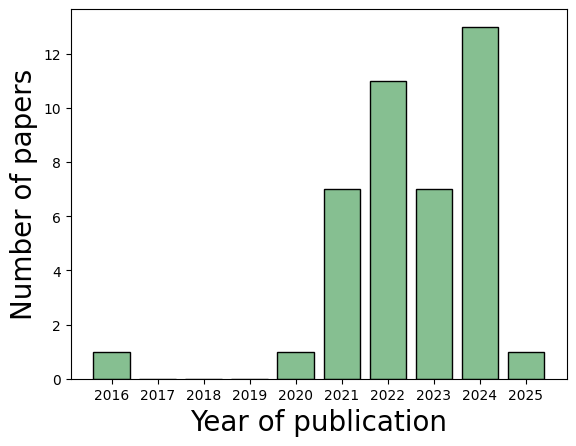

In [8]:
ax = plt.subplot()
x = list(papers_per_year.keys())
y = list(papers_per_year.values())
plt.bar(x,y, align='center', color = '#86bf91',edgecolor='black' )
ax.set_xticks(x)
ax.set_xticklabels(x, fontsize=10)
ax.set_xlabel('Year of publication', fontsize=20, )
ax.set_ylabel('Number of papers', fontsize=20, )

plt.savefig(save_loc+"per_year.png", 
            bbox_inches ="tight", 
            pad_inches = 1, 
            transparent = True, 
            orientation ='landscape') 

plt.show()

## Papers per venue

In [9]:
counts = Counter(initial_file.Venue_renamed)

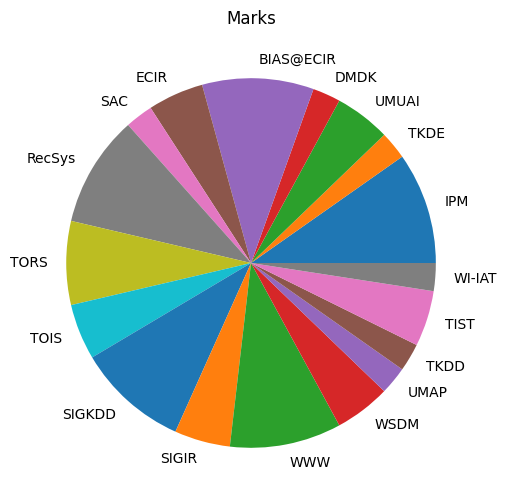

In [10]:
x,y = list(counts.keys()), list(counts.values())
plt.figure(figsize=(6,6))
plt.pie(y, labels=x)
plt.title("Marks")
plt.show()
plt.close()

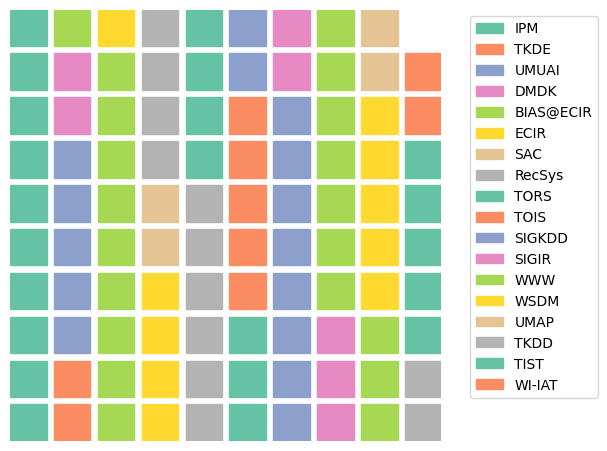

In [11]:
plt.figure(FigureClass=Waffle,
           rows = 10,
           columns = 10,
           values = counts,
           legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
)
plt.show()

In [12]:
per_venue = initial_file.drop_duplicates('Venue_renamed')[['Venue_renamed','Publisher']].reset_index(drop=True).set_index('Venue_renamed')
per_venue

,Publisher
Venue_renamed,
IPM,Elsevier
TKDE,IEEE
UMUAI,Springer
DMDK,Springer
BIAS@ECIR,Springer
ECIR,Springer
SAC,ACM
RecSys,ACM
TORS,ACM


In [13]:
per_venue['Count_per_venue'] = ''
for key in counts.keys():
    per_venue.at[key, 'Count_per_venue'] = counts[key]
per_venue = per_venue.reset_index(drop=False)
per_venue

,Venue_renamed,Publisher,Count_per_venue
0,IPM,Elsevier,4
1,TKDE,IEEE,1
2,UMUAI,Springer,2
3,DMDK,Springer,1
4,BIAS@ECIR,Springer,4
5,ECIR,Springer,2
6,SAC,ACM,1
7,RecSys,ACM,4
8,TORS,ACM,3
9,TOIS,ACM,2


In [111]:


# plotly express figure
fig = px.sunburst(per_venue, path=["Publisher", "Venue_renamed"], values='Count_per_venue')
# fig.show()


# # plotly graph_objects figure
# fig =go.Figure(go.Sunburst(
#                 labels=fig1['data'][0]['labels'].tolist(),
#                 parents=fig1['data'][0]['parents'].tolist(),
#                 values = fig1['data'][0]['values'].tolist(),
#                 insidetextorientation='radial',
#                 branchvalues="total"),
                
#                 )
fig.update_layout(
    margin = dict(t=0, l=0, r=0, b=0),
)
# fig.update_layout(uniformtext=dict(minsize=1, mode='hide'),
#                    template = 'seaborn')



fig.update_layout(
    title=dict(text="Venue and publisher", font=dict(size=30), automargin=True, yref='paper', y=0)
)



fig.update_layout(
   width=800, height=800
)
fig.update_traces(hoverinfo = 'label+percent parent', textinfo = 'label+percent root')
fig.update_traces(textfont=dict(size=30))


fig.update_traces(insidetextorientation='radial')
fig.show()
fig.write_image(save_loc+"per_venue.png")


In [95]:

data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4],
)
        
fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
    color='parent', 
    color_discrete_map={
        '': 'rgb(56, 75, 126)', 
        'Eve': 'lightgreen', 
        'Cain': 'black', 
        'Enos': 'black',
     },
)
     
fig.update_traces(textfont=dict(size=1000000))
fig.show()